In [29]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('Students Social Media Addiction (1).csv')
print(df)


     Student_ID  Age  Gender Academic_Level     Country  \
0             1   19  Female  Undergraduate  Bangladesh   
1             2   22    Male       Graduate       India   
2             3   20  Female  Undergraduate         USA   
3             4   18    Male    High School          UK   
4             5   21    Male       Graduate      Canada   
..          ...  ...     ...            ...         ...   
700         701   20  Female  Undergraduate       Italy   
701         702   23    Male       Graduate      Russia   
702         703   21  Female  Undergraduate       China   
703         704   24    Male       Graduate       Japan   
704         705   19  Female  Undergraduate      Poland   

     Avg_Daily_Usage_Hours Most_Used_Platform Affects_Academic_Performance  \
0                      5.2          Instagram                          Yes   
1                      2.1            Twitter                           No   
2                      6.0             TikTok            

In [30]:
print(df.dtypes
)

Student_ID                        int64
Age                               int64
Gender                           object
Academic_Level                   object
Country                          object
Avg_Daily_Usage_Hours           float64
Most_Used_Platform               object
Affects_Academic_Performance     object
Sleep_Hours_Per_Night           float64
Mental_Health_Score               int64
Relationship_Status              object
Conflicts_Over_Social_Media       int64
Addicted_Score                    int64
dtype: object


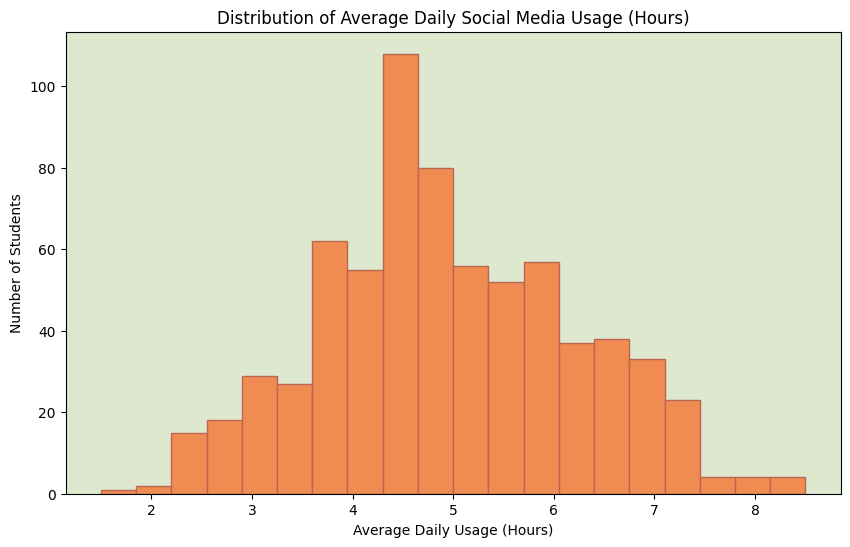

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(df['Avg_Daily_Usage_Hours'], bins=20, edgecolor='#BB6653', color='#F08B51')
plt.gca().set_facecolor('#DEE8CE')
plt.title('Distribution of Average Daily Social Media Usage (Hours)')
plt.xlabel('Average Daily Usage (Hours)')
plt.ylabel('Number of Students')
plt.show()

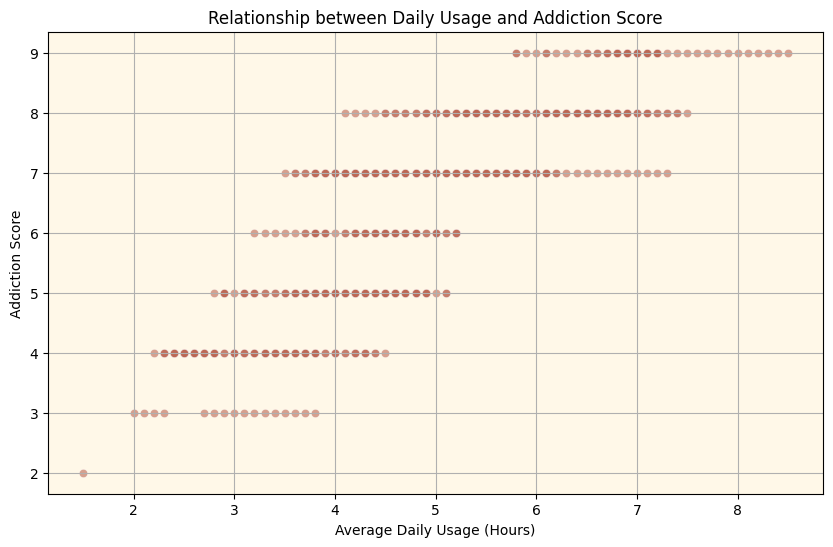

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Avg_Daily_Usage_Hours', y='Addicted_Score', alpha=0.6, color='#BB6653')
plt.gca().set_facecolor('#FFF8E8')
plt.title('Relationship between Daily Usage and Addiction Score')
plt.xlabel('Average Daily Usage (Hours)')
plt.ylabel('Addiction Score')
plt.grid(True)
plt.show()

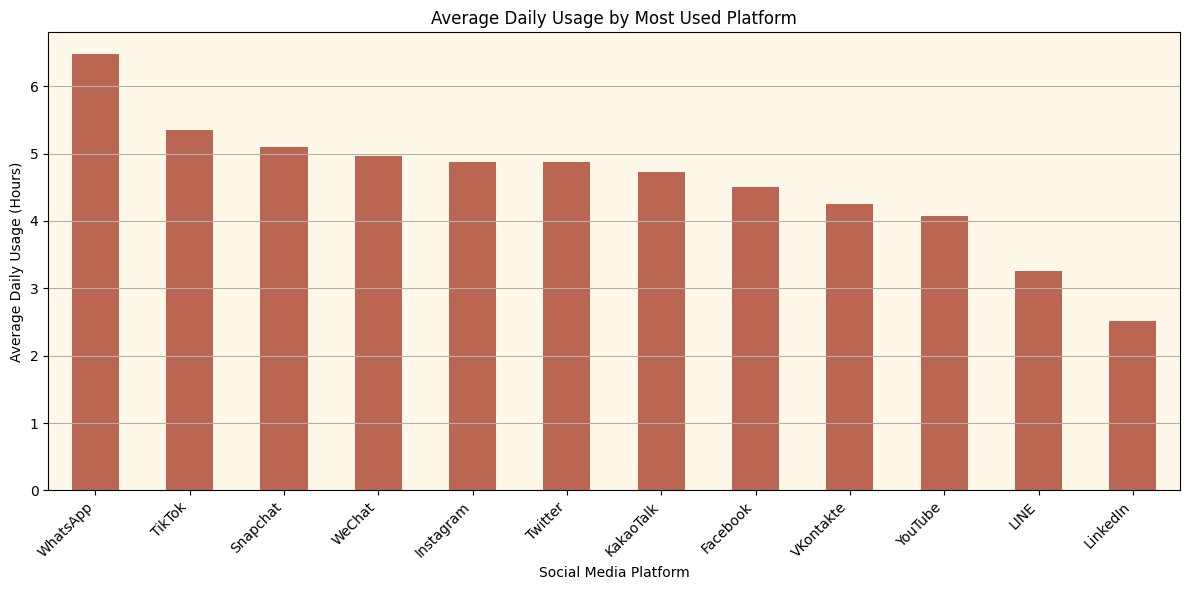

In [33]:
platform_usage = df.groupby('Most_Used_Platform')['Avg_Daily_Usage_Hours'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.gca().set_facecolor('#FFF8E8')
platform_usage.plot(kind='bar', color='#BB6653')
plt.title('Average Daily Usage by Most Used Platform')
plt.xlabel('Social Media Platform')
plt.ylabel('Average Daily Usage (Hours)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

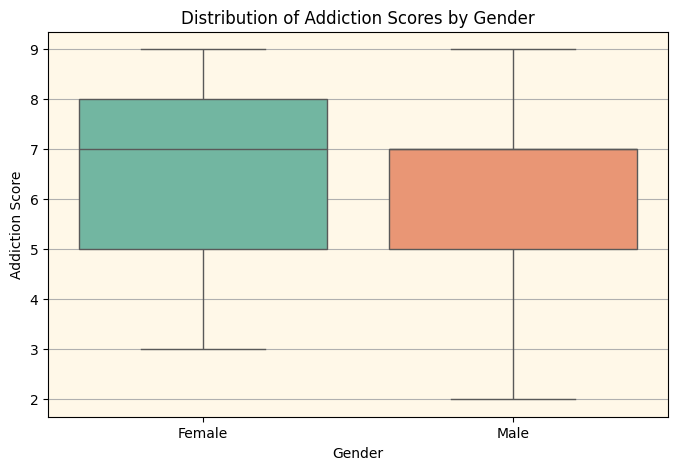

In [34]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Gender', y='Addicted_Score', hue='Gender', palette='Set2')
plt.gca().set_facecolor('#FFF8E8')
plt.title('Distribution of Addiction Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Addiction Score')
plt.grid(True, axis='y')
plt.show()

In [35]:
gender_addiction = df.groupby('Gender')['Addicted_Score'].mean()
print("\n--- Average Addiction Score by Gender ---")
print(gender_addiction)


--- Average Addiction Score by Gender ---
Gender
Female    6.515581
Male      6.357955
Name: Addicted_Score, dtype: float64


In [36]:
df['Age_Group'] = pd.cut(df['Age'], bins=[17, 19, 21, 23, 25], labels=['18-19', '20-21', '22-23', '24-25'])
age_addiction = df.groupby('Age_Group', observed=False)['Addicted_Score'].mean()
print("\n--- Average Addiction Score by Age Group ---")
print(age_addiction)


--- Average Addiction Score by Age Group ---
Age_Group
18-19    6.740113
20-21    6.532710
22-23    6.016575
24-25    6.115385
Name: Addicted_Score, dtype: float64


In [37]:
# Average Addiction Level across Academic Levels
academic_addiction = df.groupby('Academic_Level')['Addicted_Score'].mean().sort_values(ascending=False)
print("\n--- Average Addiction Score by Academic Level ---")
print(academic_addiction)


--- Average Addiction Score by Academic Level ---
Academic_Level
High School      8.037037
Undergraduate    6.492918
Graduate         6.243077
Name: Addicted_Score, dtype: float64


In [38]:
# Function to classify risk level based on usage hours
def classify_risk_level(hours):
    if hours < 3:
        return 'Low'
    elif hours < 6:
        return 'Medium'
    else:
        return 'High'

df['Risk_Level'] = df['Avg_Daily_Usage_Hours'].apply(classify_risk_level)


In [39]:
# Function to suggest digital detox strategies
def suggest_strategy(risk_level):
    if risk_level == 'Low':
        return "Maintain healthy habits. Set specific times for checking social media."
    elif risk_level == 'Medium':
        return "Consider setting daily time limits. Take short breaks (e.g., 30 mins) from all screens before bedtime."
    elif risk_level == 'High':
        return "Urgent: Implement a structured digital detox plan. Use app blockers. Seek support from friends/family/counselor."
    else:
        return "Invalid risk level."
    
df['Detox_Suggestion'] = df['Risk_Level'].apply(suggest_strategy)

In [40]:
print("\n--- Risk Level Classification & Detox Suggestions ---")
print(df[['Student_ID', 'Avg_Daily_Usage_Hours', 'Risk_Level', 'Detox_Suggestion']].head(10))


--- Risk Level Classification & Detox Suggestions ---
   Student_ID  Avg_Daily_Usage_Hours Risk_Level  \
0           1                    5.2     Medium   
1           2                    2.1        Low   
2           3                    6.0       High   
3           4                    3.0     Medium   
4           5                    4.5     Medium   
5           6                    7.2       High   
6           7                    1.5        Low   
7           8                    5.8     Medium   
8           9                    4.0     Medium   
9          10                    3.3     Medium   

                                    Detox_Suggestion  
0  Consider setting daily time limits. Take short...  
1  Maintain healthy habits. Set specific times fo...  
2  Urgent: Implement a structured digital detox p...  
3  Consider setting daily time limits. Take short...  
4  Consider setting daily time limits. Take short...  
5  Urgent: Implement a structured digital detox p... 

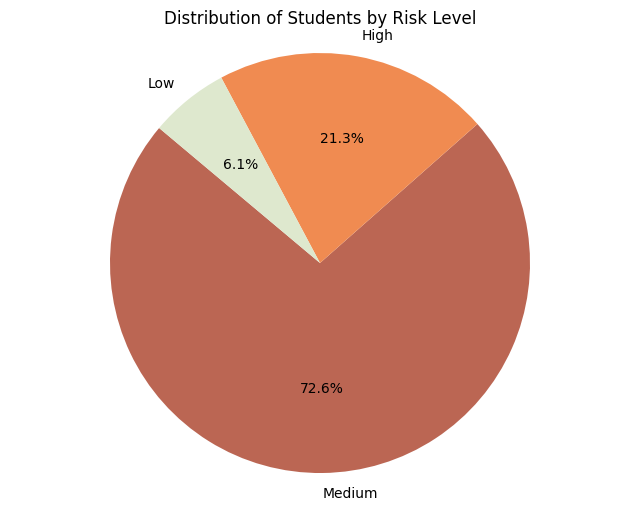

In [45]:
# 5. Distribution of Risk Levels
risk_counts = df['Risk_Level'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(risk_counts.values, labels=risk_counts.index, autopct='%1.1f%%', startangle=140, colors=['#BB6653', '#F08B51', '#DEE8CE'])

plt.title('Distribution of Students by Risk Level')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

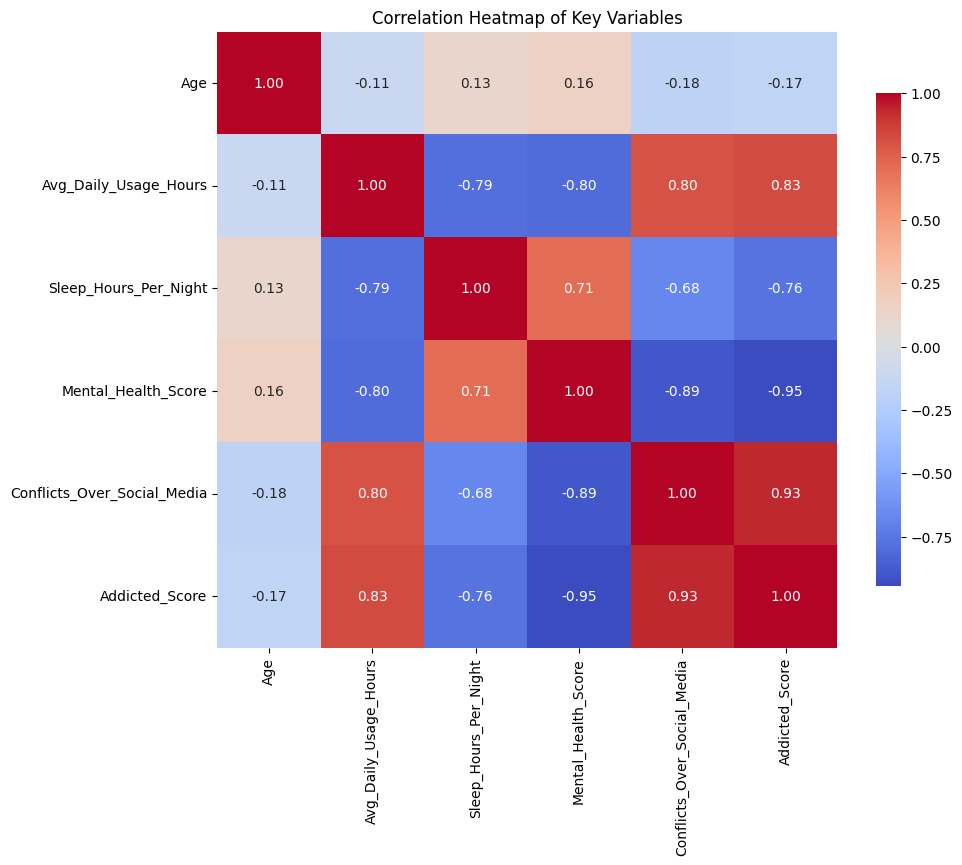

In [21]:
# 6. Heatmap: Correlation between numerical variables
# Select relevant numerical columns
corr_columns = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']
corr_matrix = df[corr_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap of Key Variables')
plt.show()

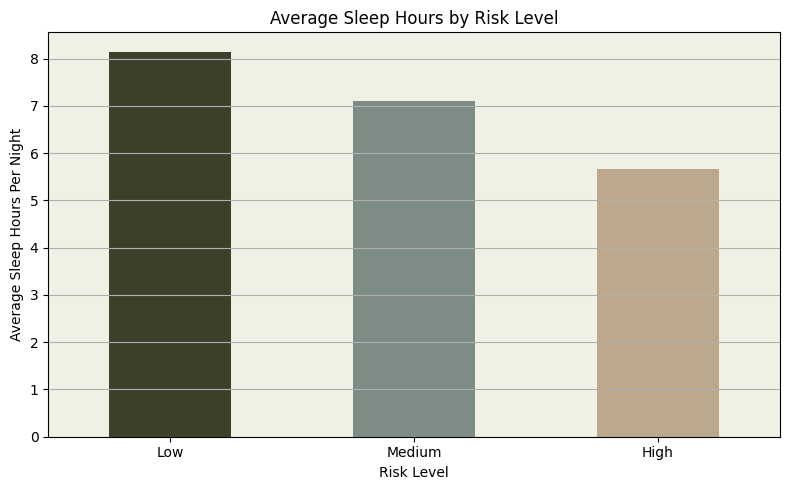

In [52]:
# 7. Average Sleep Hours by Risk Level
sleep_by_risk = df.groupby('Risk_Level')['Sleep_Hours_Per_Night'].mean().reindex(['Low', 'Medium', 'High']) # Order for clarity
plt.figure(figsize=(8, 5))
sleep_by_risk.plot(kind='bar', color=['#3E3F29', '#7D8D86', '#BCA88D'])
plt.gca().set_facecolor('#F1F0E4')
plt.title('Average Sleep Hours by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Average Sleep Hours Per Night')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

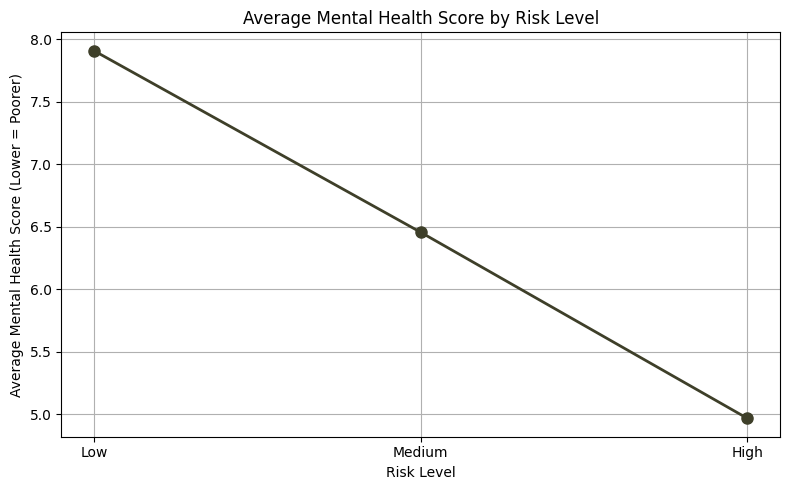

In [50]:
# 8. Average Mental Health Score by Risk Level
mental_by_risk = df.groupby('Risk_Level')['Mental_Health_Score'].mean().reindex(['Low', 'Medium', 'High'])
plt.figure(figsize=(8, 5))
mental_by_risk.plot(kind='line', marker='o', color='#3E3F29', linewidth=2, markersize=8)
plt.title('Average Mental Health Score by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Average Mental Health Score (Lower = Poorer)')
plt.xticks(ticks=[0, 1, 2], labels=['Low', 'Medium', 'High'])
plt.grid(True)
plt.tight_layout()
plt.show()
# Insight: Mental health scores tend to decrease as the risk level of social media usage increases, indicating a negative impact on psychological well-being.


In [24]:
story_summary = """
This study is showing one very big problem of students using too much social media, it is almost like an addiction for them.
Apps like Instagram and TikTok, these are the main culprits where they are spending all their time. So many students are now in the 'High' risk group.
The numbers are telling a clear story: the more they are using these things, the less they are sleeping well and their mind is also not in a good place.
Between boys and girls there is not so much difference, but younger college students, the ones doing their BA or BSc, they are maybe having the most trouble.
Their studies and exam marks are also getting spoiled because of all this usage.
To fight this problem, we must be having some special programs for 'digital wellness'.
In these programs, we should be telling everyone about the dangers, give them some simple tools to limit their phone time, and also tell them to take a break from the internet sometimes, a 'digital detox'.
If we make a special plan for each student based on how much risk they have, it will be working much better.
Helping our students to make good and healthy habits for using the internet is very, very important for their own good and for them to pass in their exams.
"""

print("\n--- 10-Line Story Summary ---")
lines = story_summary.strip().split('\n')
for i, line in enumerate(lines):
    if i < 10:
        print(f"{i+1}. {line.strip()}")
    else:
        break


--- 10-Line Story Summary ---
1. This study is showing one very big problem of students using too much social media, it is almost like an addiction for them.
2. Apps like Instagram and TikTok, these are the main culprits where they are spending all their time. So many students are now in the 'High' risk group.
3. The numbers are telling a clear story: the more they are using these things, the less they are sleeping well and their mind is also not in a good place.
4. Between boys and girls there is not so much difference, but younger college students, the ones doing their BA or BSc, they are maybe having the most trouble.
5. Their studies and exam marks are also getting spoiled because of all this usage.
6. To fight this problem, we must be having some special programs for 'digital wellness'.
7. In these programs, we should be telling everyone about the dangers, give them some simple tools to limit their phone time, and also tell them to take a break from the internet sometimes, a 'dig

In [25]:
print("\n--- Final Dataframe Sample ---")
print(df.head())



--- Final Dataframe Sample ---
   Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes                    6.0   

   Mental_Health_Score Relatio